In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

C:\Users\MRUH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
##Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Description of columns
- MPG:Milege of the car (Mile per Gallon) (this is Y-column to be predicted)
- HP:Horse Power of the car(X1 column)
- VOl:Volume of the car(size)
- SP:Top speed of the car(Mile per Hour) (X3 cloumn)
- WT:Weight of the car(Pounds)(X4 column)

### Assumptions in Multilinear Regression
- **1.Linearity:** The relation between the predictors(X) and the response (Y) is linear
- **2.Independence:** Observations are independent of each other
- **3.Homoscedasticity:** The residuals(Y-Y_hat) exhibit constant variance at all levels of the predictor.
- **4.Normal Distribution of Errors:** The residuals of the model are normally distributed.
- **5.No multicollinearity:** The independent variables should not be too highly correlated with each other.
- Violations of these assumptions may lead to inefficiency in the regression 

### EDA

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
#check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations:
- There are no missing values
- There are 81 Observations (81 different cars data)
- The data types of the columns are also relevant and valid

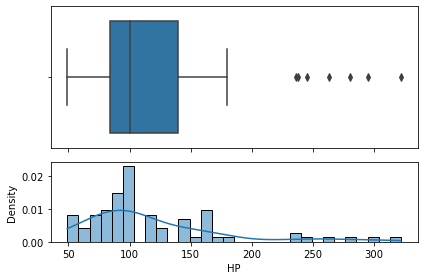

In [6]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                                                   

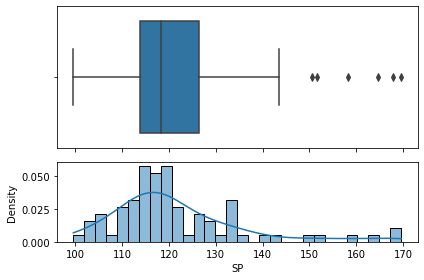

In [7]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

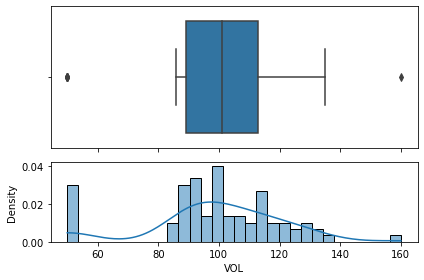

In [8]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

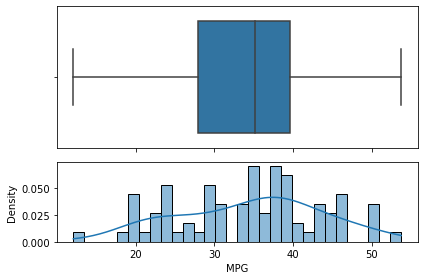

In [9]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

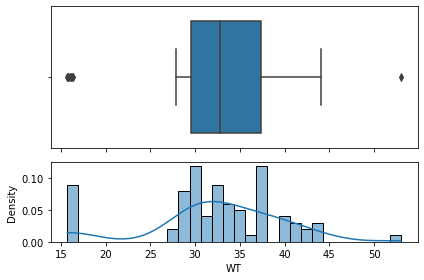

In [10]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1.5, .85)})

#Create a boxplot
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

#Adjust layout
plt.tight_layout()
plt.show()                                                                   
                                        

#### Observations:
- There are some extreme values (outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns, a few outliers are observed in both tails of distributions.
- The extreme values of cars data may have come from specially designed nature of cars
- As this is multi-dimensional data, theoutliers with respect to spatial dimensions may have to be considered while building the regression model.

### Checking for duplicated rows

In [11]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


#### Pair plots and COrrelation Coefficients


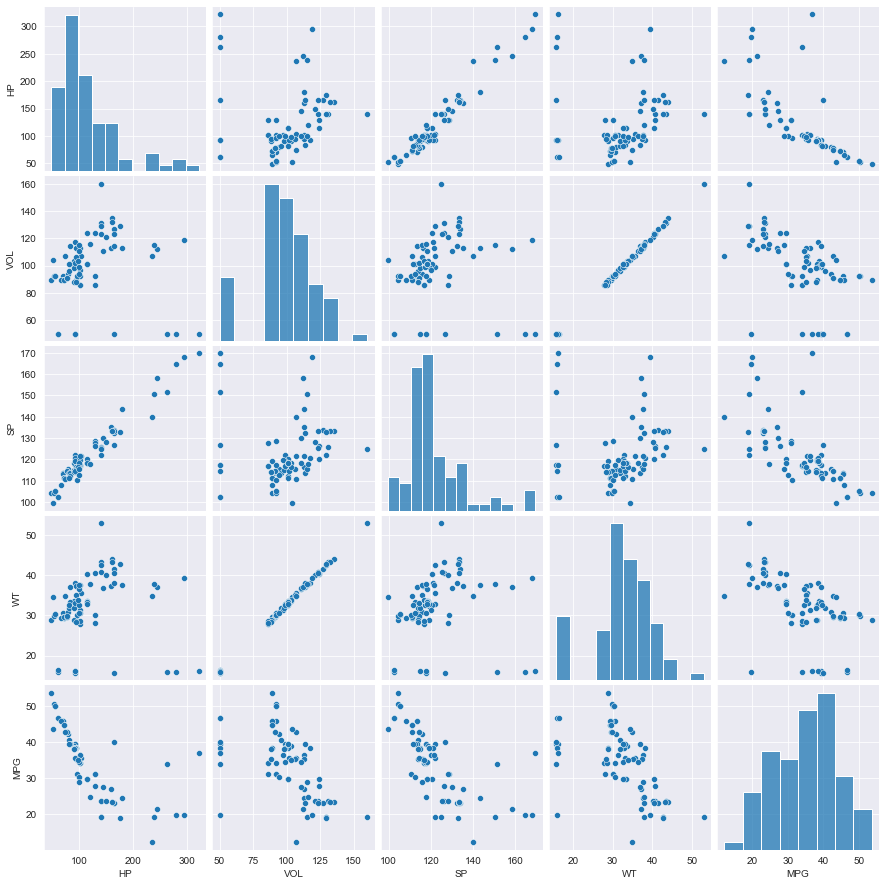

In [12]:
#pair plots
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [13]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


### 6-2-25

#### Observations from correlation points and coefficients
- Between x and y, alla the x variables are showing moderate to high correlation strengths, highest being HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG
- Among x columns (x1,x2,x3 and x4),some very high correlation strengths are observed between SP vs HP,VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

In [14]:
#Build
#import statsmodels.formula.api as smf
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:27:37   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations
- The R-squared and adjusted R-squared values are good and about 75% of variability in Y is explained by X columns
- The probability value with respect to F-statistic is close to zero, indicating that or some of X columns are significant
- The p-values for VOL and WT are higher than 5% indicating some interaction issue among themselves,which need to be further explored

#### Performance metrics for model1

In [16]:
# Find the performance metrics
# Create a data frame with actual y and predicted y columns

df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


### 7-2-25

In [17]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [18]:
# Compute the Mean Squared Error(MSE), RMSE for model1

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df1["actual_y1"], df1["pred_y1"])
print("MSE :", mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.897141152343107
RMSE : 4.347084212704316


#### Checking for multicolinearity among X-columns using VIF method

In [19]:
# Compute VIF values

rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#### Observations for VIF values:
- The ideal range of VIF values shall be between 0 to 10. However slightly higher values can be tolerated 
- As seen from the very high VIF values for VOL and WT, it clear that they are prone to multicollinearity proble. 
- Hence it is decided to drop one of the columns (either VOL or WT) to overcome the multicollinearity. 
- It is decided to drop WT and retain VOL column in further models

In [20]:
cars1 = cars.drop("WT", axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [21]:
# Build model2 on cars1 dataset
import statsmodels.formula.api as smf
model2=smf.ols('MPG~+VOL+SP+HP',data=cars1).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        12:27:59   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Performance metrics for model2

In [26]:
# Find the preformance metrics
# Create a data frame with actual y and predicted y columns

df2 = pd.DataFrame()
df2["actual_y2"] = cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [27]:
# Predict for the given X data columns

pred_y2 = model2.predict(cars1.iloc[:,0:4])
df2["pred_y2"] = pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [29]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df2["actual_y2"], df2["pred_y2"])
print("MSE : ",mse)
print("RMSE : ",np.sqrt(mse))

MSE :  18.91105338871122
RMSE :  4.34868409851891


#### Observations from model2 summary()
- The adjusted R-suared value improved slightly to 0.76 
- All the p-values for model parameters are less than 5% hence they are significant 
- Therefore the HP, VOL, SP columns are finalized as the significant predictor for the MPG response variable 
- There is no improvement in MSE value

